In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [2]:
## Read in the cleaned dataframe from Lab 1
url = "https://raw.githubusercontent.com/nedeinlein/Machine_Learning_I/main/runs_clean.csv"
runs_df = pd.read_csv(url, index_col=False)

In [3]:
# Summary statistics of each feature
runs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79423 entries, 0 to 79422
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       79423 non-null  int64  
 1   race_id          79423 non-null  int64  
 2   horse_no         79423 non-null  int64  
 3   horse_id         79423 non-null  int64  
 4   result           79423 non-null  int64  
 5   won              79423 non-null  float64
 6   lengths_behind   79423 non-null  float64
 7   horse_age        79423 non-null  int64  
 8   horse_country    79423 non-null  object 
 9   horse_type       79423 non-null  object 
 10  horse_rating     79423 non-null  int64  
 11  horse_gear       79423 non-null  object 
 12  declared_weight  79423 non-null  float64
 13  actual_weight    79423 non-null  int64  
 14  draw             79423 non-null  int64  
 15  position_sec1    79423 non-null  int64  
 16  position_sec2    79423 non-null  int64  
 17  position_sec

In [ ]:
# Add a Place result feature




In [4]:
# Use one hot encoding on non-numerical features
## (Then remove them from the drop code chunk below)




In [ ]:
# Normalize the scales of variables




In [5]:
# Split the data and target
# Only use features known pre-race (e.g. not finish time)
# Remove non-numerical features (e.g. horse country)
runs_data = runs_df.drop(['Unnamed: 0','race_id','horse_id','result','won','lengths_behind','horse_country','horse_type','horse_gear','position_sec1','position_sec2','position_sec3','behind_sec1','behind_sec2','behind_sec3','time1','time2','time3','finish_time','trainer_id','jockey_id'], axis=1)
runs_target = runs_df['won']

X_train,X_test,Y_train,Y_test = train_test_split(runs_data,runs_target,test_size=0.20,random_state=0)

In [12]:
# Use Logistic Regression to predict win/loss
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', solver='liblinear' )
lr.fit(X_train,Y_train)
yhat = lr.predict(X_test)

acc = mt.accuracy_score(Y_test,yhat)
conf = mt.confusion_matrix(Y_test,yhat)
print("Accuracy: ", acc, "%" )
print("Confusion Matrix: \n",conf)

Accuracy:  0.5548630783758263 %
Confusion Matrix: 
 [[7730 6896]
 [ 175 1084]]


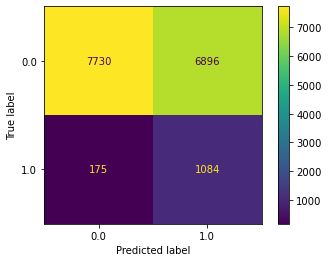

In [7]:
# Plot the confusion matrix
plot_confusion_matrix(lr, X_test, Y_test)

In [8]:
# Look at the weights
# Source: github/jakemdrew/DataMiningNotebook 4

weights = lr.coef_.T
variable_names = X_train.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

horse_no has weight of -0.002237582389538193
horse_age has weight of 0.0043825330462001055
horse_rating has weight of 0.0007784070799899759
declared_weight has weight of 0.0008365774594610835
actual_weight has weight of 0.0003441433193013598
draw has weight of -0.004366868449994774
win_odds has weight of -0.059762596726509354
place_odds has weight of -0.01298796524530625


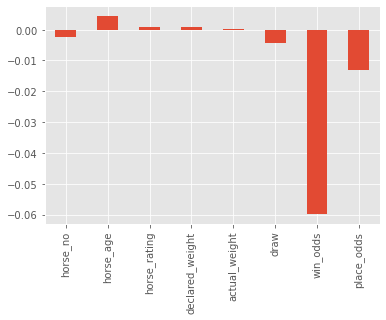

In [9]:
# Plot the weights to compare them
# Source: github/jakemdrew/DataMiningNotebook 4

plt.style.use('ggplot')

weights = pd.Series(lr.coef_[0],index=X_train.columns)
weights.plot(kind='bar')
plt.show()

In [ ]:
# Re-do the above, but for a Place bet using the new Place feature